# Chapter 1_5 定序回归
----
Author: W.Y.  
Date: 2020/1/16  
Update: 2020/2/5  
Info: 王汉生老师书的第五章，定序回归的python极简实现  

----

In [22]:
# 导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import linear_ordinal_regression as ordinal

需要的包[参考](https://github.com/Shopify/bevel/blob/master/requirements.txt)

>numpy>=1.13.3  
>scipy>=1.0.0  
>pandas>=0.21.0  
>numdifftools>=0.9.20

[来源](https://github.com/Shopify/bevel)

In [2]:
# 导入数据

data = pd.read_csv('E:/Data Mining/SimplePython/Chapter 1 从R到Python/CH 1_5 定序回归/CH 1_5 data ceilphone.csv')

In [3]:
data.head()

,score,W1,W2,W3,W4,W5,W6,W7
0,3,Nokia,0,0,0,1,1,3
1,4,Nokia,1,0,1,0,1,5
2,4,Nokia,0,1,1,0,0,7
3,4,Bird,1,1,0,1,0,3
4,3,Bird,0,0,0,0,1,5


In [4]:
w1_table = pd.crosstab(index=data['score'], columns=data['W1'], values=data['score'], aggfunc='count')
print(w1_table)

W1     Bird  Motorola  Nokia  Samsung
score                                
1        37        24     34       26
2        80        64     53       66
3        98       138    132      133
4       109       108    116       96
5        28        30     35       44


Text(0.5, 1.0, 'Digital Camera')

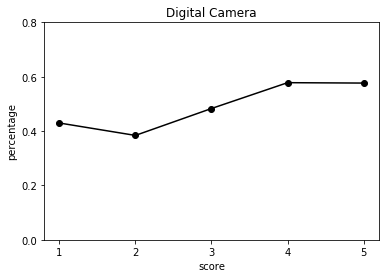

In [5]:
plt.plot(data.groupby('score')['W2'].mean(),'o-',color='black')
plt.xticks(range(1,6,1))
plt.yticks(np.arange(0,1,0.2))
plt.xlabel('score')
plt.ylabel('percentage')
plt.title('Digital Camera')

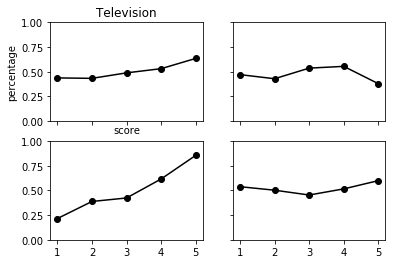

In [15]:
fig, ax = plt.subplots(2,2,sharex='all', sharey='all')
ax[0][0].plot(data.groupby('score')['W3'].mean(),'o-',color='black')
ax[0][0].set_ylim(0,1)
ax[0][0].set_xlabel('score')
ax[0][0].set_ylabel('percentage')
ax[0][0].set_title('Television')
ax[0][1].plot(data.groupby('score')['W4'].mean(),'o-',color='black')
ax[1][0].plot(data.groupby('score')['W5'].mean(),'o-',color='black')
ax[1][1].plot(data.groupby('score')['W6'].mean(),'o-',color='black')

In [16]:
w7_table = pd.crosstab(index=data['score'], columns=data['W7'], values=data['score'], aggfunc='count')
print(w7_table)

W7       3    5    7
score               
1       25   67   29
2       71  113   79
3      169  187  145
4      155  111  163
5       64    9   64


In [31]:
data['W1_code'] = pd.Categorical(data['W1']).codes
X = data.iloc[:,2:9]

In [35]:
# probit

probit1 = ordinal.OrderedProbit()
probit1.fit(X, data['score'])
print(probit1.print_summary())


n=1451
                   beta  se(beta)      p  lower 0.95  upper 0.95     
attribute names                                                      
W2               0.3085    0.0557 0.0000      0.1993      0.4176  ***
W3               0.2609    0.0605 0.0000      0.1422      0.3795  ***
W4               0.2573    0.0609 0.0000      0.1379      0.3767  ***
W5               0.8889    0.0628 0.0000      0.7658      1.0119  ***
W6               0.1352    0.0618 0.0287      0.0141      0.2563    *
W7              -0.0093    0.0174 0.5916     -0.0434      0.0248     
W1_code          0.1085    0.0281 0.0001      0.0535      0.1635  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Somers' D = 0.294
None
